In [2]:
import pandas as pd
import numpy as np

### Series

In [218]:
exam1 = [89, 85,93,83]
labels = ['Student A', 'Student B', 'Student C', 'Student D']

In [219]:
pd.Series(exam1, labels)

Student A    89
Student B    85
Student C    93
Student D    83
dtype: int64

In [220]:
pd.Series(exam1, labels)['Student D']

83

In [221]:
d = {s:p for s,p in zip(labels, exam1)}
d

{'Student A': 89, 'Student B': 85, 'Student C': 93, 'Student D': 83}

In [222]:
pd.Series(d)

Student A    89
Student B    85
Student C    93
Student D    83
dtype: int64

In [223]:
exam2 = [74, 56, 44, 92]
e1 = pd.Series(exam1, labels)
e2 = pd.Series(exam2, labels)

In [224]:
e1 + e2

Student A    163
Student B    141
Student C    137
Student D    175
dtype: int64

In [225]:
e1 *e2

Student A    6586
Student B    4760
Student C    4092
Student D    7636
dtype: int64

In [226]:
e1/5

Student A    17.8
Student B    17.0
Student C    18.6
Student D    16.6
dtype: float64

### DataFrame

In [227]:
df = pd.DataFrame({'e1':exam1, 'e2':exam2}, index = labels)
df

,e1,e2
Student A,89,74
Student B,85,56
Student C,93,44
Student D,83,92


In [228]:
df['e1']

Student A    89
Student B    85
Student C    93
Student D    83
Name: e1, dtype: int64

In [229]:
type(df['e1'])

pandas.core.series.Series

In [231]:
data = np.array([exam1, exam2])
data.transpose()

array([[89, 74],
       [85, 56],
       [93, 44],
       [83, 92]])

In [232]:
df = pd.DataFrame(data.transpose(), index=labels, columns=['e1', 'e2'])
df

,e1,e2
Student A,89,74
Student B,85,56
Student C,93,44
Student D,83,92


In [233]:
df.to_numpy()

array([[89, 74],
       [85, 56],
       [93, 44],
       [83, 92]])

In [234]:
df.shape

(4, 2)

In [235]:
df['e1']

Student A    89
Student B    85
Student C    93
Student D    83
Name: e1, dtype: int32

In [236]:
df.e1

Student A    89
Student B    85
Student C    93
Student D    83
Name: e1, dtype: int32

In [237]:
df['e3'] = [67,59,79,84]
df

,e1,e2,e3
Student A,89,74,67
Student B,85,56,59
Student C,93,44,79
Student D,83,92,84


In [238]:
df['semestr1'] = df['e1'] + df['e2'] + df['e3']
df

,e1,e2,e3,semestr1
Student A,89,74,67,230
Student B,85,56,59,200
Student C,93,44,79,216
Student D,83,92,84,259


In [239]:
df[['e1', 'e2']]

,e1,e2
Student A,89,74
Student B,85,56
Student C,93,44
Student D,83,92


In [240]:
df.loc['Student C']

e1           93
e2           44
e3           79
semestr1    216
Name: Student C, dtype: int64

In [241]:
df.loc['Student C', 'e2']

44

In [242]:
df.loc[['Student C', 'Student D'], ['e2']]

,e2
Student C,44
Student D,92


In [243]:
df.iloc[1]

e1           85
e2           56
e3           59
semestr1    200
Name: Student B, dtype: int64

In [244]:
df.iloc[1:,1]

Student B    56
Student C    44
Student D    92
Name: e2, dtype: int32

### Masking na podstawie wyrażeń logicznych

In [245]:
df['e2']>70

Student A     True
Student B    False
Student C    False
Student D     True
Name: e2, dtype: bool

In [246]:
df[df['e2']>70]

,e1,e2,e3,semestr1
Student A,89,74,67,230
Student D,83,92,84,259


In [247]:
df[(df['e2']<50) | (df['e2']>90)]

,e1,e2,e3,semestr1
Student C,93,44,79,216
Student D,83,92,84,259


In [248]:
df[(df['e2']<50) | (df['e1']>90)]

,e1,e2,e3,semestr1
Student C,93,44,79,216


### Podstawowe operacje

##### Usuwanie wierszy, parametr Inpalce

In [249]:
df.drop('semestr1', axis =1)

,e1,e2,e3
Student A,89,74,67
Student B,85,56,59
Student C,93,44,79
Student D,83,92,84


In [250]:
df

,e1,e2,e3,semestr1
Student A,89,74,67,230
Student B,85,56,59,200
Student C,93,44,79,216
Student D,83,92,84,259


In [251]:
df.drop(['e3', 'semestr1'], axis=1, inplace = True)
df

,e1,e2
Student A,89,74
Student B,85,56
Student C,93,44
Student D,83,92


In [252]:
df.drop('Student B', inplace=True)
df

,e1,e2
Student A,89,74
Student C,93,44
Student D,83,92


##### Resetowanie i usuwanie indeksu

In [253]:
df.reset_index() # jeśli chcemy zachować zmiany, 
#musimy użyć parametru inlapce i ustawić go na wartość True

,index,e1,e2
0,Student A,89,74
1,Student C,93,44
2,Student D,83,92


In [254]:
df

,e1,e2
Student A,89,74
Student C,93,44
Student D,83,92


##### Funkcja "set_index"

In [255]:
df_new_index = df.reset_index()
df_new_index

,index,e1,e2
0,Student A,89,74
1,Student C,93,44
2,Student D,83,92


In [256]:
df_new_index['student_name'] = ['Adrian', 'Bartłomiej', 'Celina']
df_new_index

,index,e1,e2,student_name
0,Student A,89,74,Adrian
1,Student C,93,44,Bartłomiej
2,Student D,83,92,Celina


In [257]:
df_new_index.set_index('student_name')

,index,e1,e2
student_name,,,
Adrian,Student A,89,74
Bartłomiej,Student C,93,44
Celina,Student D,83,92


##### Zmiany bezpośrednio na atrybucie "index"

In [258]:
df_new_index2 = df.reset_index()
df_new_index2

,index,e1,e2
0,Student A,89,74
1,Student C,93,44
2,Student D,83,92


In [259]:
df_new_index2.index = ['Adrian', 'Bartłomiej', 'Celina']
df_new_index2

,index,e1,e2
Adrian,Student A,89,74
Bartłomiej,Student C,93,44
Celina,Student D,83,92


### Funkcja "rename" - zmiana  etykiet kolumn i wierszy

In [260]:
df.rename(columns={'e1':'exam1', 'e2':'exam2', 'e3':'exam3'})

,exam1,exam2
Student A,89,74
Student C,93,44
Student D,83,92


In [261]:
df.rename(str.upper, axis='columns')

,E1,E2
Student A,89,74
Student C,93,44
Student D,83,92


### Uniqe, value_counts, sort_values, drop_duplicates

In [262]:
df = pd.DataFrame({'A':[100,44,56,99,85,100], 'B':['Panda','Snake','Snake','Rat','Dog','Panda']})
df

,A,B
0,100,Panda
1,44,Snake
2,56,Snake
3,99,Rat
4,85,Dog
5,100,Panda


##### Unique, nunique

In [263]:
df['B'].unique()

array(['Panda', 'Snake', 'Rat', 'Dog'], dtype=object)

In [264]:
df['B'].nunique()

4

##### Value_counts

In [265]:
df['B'].value_counts()

Panda    2
Snake    2
Rat      1
Dog      1
Name: B, dtype: int64

In [266]:
df['B'].value_counts(normalize=True)

Panda    0.333333
Snake    0.333333
Rat      0.166667
Dog      0.166667
Name: B, dtype: float64

##### Sort_values

In [267]:
df.sort_values(by='A')

,A,B
1,44,Snake
2,56,Snake
4,85,Dog
3,99,Rat
0,100,Panda
5,100,Panda


In [268]:
df.sort_values(by='A', ascending=False)

,A,B
0,100,Panda
5,100,Panda
3,99,Rat
4,85,Dog
2,56,Snake
1,44,Snake


##### Drop_duplicates

In [269]:
df.drop_duplicates()

,A,B
0,100,Panda
1,44,Snake
2,56,Snake
3,99,Rat
4,85,Dog


### MuliIndex

In [270]:
exam1 = [89,85,93,83]
exam2 = [74,56,44,92]
exam3 = [67,59,79,84]
df = pd.DataFrame({'e1':exam1, 'e2':exam2, 'e3':exam3}, index=labels)
df['semestr1'] = df['e1'] + df['e2'] +df['e3']
df

,e1,e2,e3,semestr1
Student A,89,74,67,230
Student B,85,56,59,200
Student C,93,44,79,216
Student D,83,92,84,259


##### MultiIndex.from_tuples

In [271]:
schools = ['High School X', 'High School X', 'High School Y', 'High School Y']
multi_index_list = [(school,student) for school,student in zip(schools,df.index)]
multi_index_list

[('High School X', 'Student A'),
 ('High School X', 'Student B'),
 ('High School Y', 'Student C'),
 ('High School Y', 'Student D')]

In [272]:
df.index = pd.MultiIndex.from_tuples(multi_index_list, name = ['School', 'Student'])
df

e1  e2  e3  semestr1
School        Student                        
High School X Student A  89  74  67       230
              Student B  85  56  59       200
High School Y Student C  93  44  79       216
              Student D  83  92  84       259

##### Funkcja "set_index"

In [273]:
exam1 = [89,85,93,83]
exam2 = [74,56,44,92]
exam3 = [67,59,79,84]
df = pd.DataFrame({'e1':exam1, 'e2':exam2, 'e3':exam3}, index=labels)
df['semestr1'] = df['e1'] + df['e2'] +df['e3']
df

,e1,e2,e3,semestr1
Student A,89,74,67,230
Student B,85,56,59,200
Student C,93,44,79,216
Student D,83,92,84,259


In [274]:
df.set_index([pd.Index(['High School X', 'High School X', 'High School Y', 'High School Y']),  df.index], inplace=True)
df

e1  e2  e3  semestr1
High School X Student A  89  74  67       230
              Student B  85  56  59       200
High School Y Student C  93  44  79       216
              Student D  83  92  84       259

In [275]:
df.index.names = ['School', 'Student']
df

e1  e2  e3  semestr1
School        Student                        
High School X Student A  89  74  67       230
              Student B  85  56  59       200
High School Y Student C  93  44  79       216
              Student D  83  92  84       259

In [276]:
df.loc['High School X']

,e1,e2,e3,semestr1
Student,,,,
Student A,89,74,67,230
Student B,85,56,59,200


In [277]:
df.loc['High School X'].iloc[1]

e1           85
e2           56
e3           59
semestr1    200
Name: Student B, dtype: int64

In [278]:
df.xs('High School Y')

,e1,e2,e3,semestr1
Student,,,,
Student C,93,44,79,216
Student D,83,92,84,259


In [279]:
df.xs(('High School Y', 'Student D'))

e1           83
e2           92
e3           84
semestr1    259
Name: (High School Y, Student D), dtype: int64

In [280]:
df.xs('Student D', level='Student')

,e1,e2,e3,semestr1
School,,,,
High School Y,83,92,84,259


##### Ćwiczenie
Do tabeli przypisanej do zmiennej df dodaj kolumny: e4, e5, e6. Niech wektory tych kolumn odzwierciedlają wyniki z kolejnych egzaminów w drugim semestrze Studentów A, B, C oraz D. Wyniki tych egzaminów niech będą losowane z liczb całkowitych o zakresie 1-100 włącznie. Następnie usuń kolumnę semester1. Po wykonaniu tych operacji stwórz indeks hierarchiczny dla kolumn tabeli, tak aby jego najwyższym rzędem było oznaczenie semestru, w którym napisany był dany egzamin.

In [281]:
labels = ['Student A', 'Student B', 'Student C', 'Student D']
exam1 = [89,85,93,83]
exam2 = [74,56,44,92]
exam3 = [67,59,79,84]
exam4 = np.random.randint(1, 100, 4) 
exam5 = np.random.randint(1, 100, 4)
exam6 = np.random.randint(1, 100, 4)
df = pd.DataFrame({'e1':exam1, 'e2':exam2, 'e3':exam3, 'e4':exam4, 'e5':exam5, 'e6':exam6}, index=labels)
df['semestr1'] = df['e1'] + df['e2'] +df['e3']
df['semestr2'] = df['e4'] + df['e5'] +df['e6']
df

,e1,e2,e3,e4,e5,e6,semestr1,semestr2
Student A,89,74,67,82,17,39,230,138
Student B,85,56,59,61,82,57,200,200
Student C,93,44,79,57,98,50,216,205
Student D,83,92,84,5,56,70,259,131


In [282]:
df.drop('semestr1', axis=1, inplace=True)

In [296]:
df.drop('semestr2', axis=1, inplace=True)

In [297]:
df

,e1,e2,e3,e4,e5,e6
Student A,89,74,67,82,17,39
Student B,85,56,59,61,82,57
Student C,93,44,79,57,98,50
Student D,83,92,84,5,56,70


In [298]:
semestry = ['Semestr 1','Semestr 1','Semestr 1','Semestr 2','Semestr 2','Semestr 2']
multi_index_list = [(semestr, egzamin) for semestr, egzamin in zip(semestry, df.columns)]
multi_index_list

[('Semestr 1', 'e1'),
 ('Semestr 1', 'e2'),
 ('Semestr 1', 'e3'),
 ('Semestr 2', 'e4'),
 ('Semestr 2', 'e5'),
 ('Semestr 2', 'e6')]

In [302]:
df.columns = pd.MultiIndex.from_tuples(multi_index_list)
df

Semestr 1         Semestr 2        
                 e1  e2  e3        e4  e5  e6
Student A        89  74  67        82  17  39
Student B        85  56  59        61  82  57
Student C        93  44  79        57  98  50
Student D        83  92  84         5  56  70

### Groupby

In [314]:
df = pd.DataFrame({'Category':['Games','Games','Games','Film&Video','Film&Video','Film&Video'],
'Project_Title':['The Last Faith','Magic Puzzles','Dinosaur Fossil Hunter','Beyond Your Eyes','5150','8-Bit Wars'],
'Pledged':[92774,2873519,7962,276,23963,6950],
'Country':['UK','USA','Poland','Bulgaria','USA','UK'], 
'Date_Start':['2020-03-21','2020-03-11','2020-04-16','2020-02-09','2020-04-10','2020-03-19']})
df

,Category,Project_Title,Pledged,Country,Date_Start
0,Games,The Last Faith,92774,UK,2020-03-21
1,Games,Magic Puzzles,2873519,USA,2020-03-11
2,Games,Dinosaur Fossil Hunter,7962,Poland,2020-04-16
3,Film&Video,Beyond Your Eyes,276,Bulgaria,2020-02-09
4,Film&Video,5150,23963,USA,2020-04-10
5,Film&Video,8-Bit Wars,6950,UK,2020-03-19


In [315]:
df.groupby('Category')

In [316]:
df.groupby('Category').sum()

C:\Users\magda\AppData\Local\Temp\ipykernel_5240\86654594.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Category').sum()


,Pledged
Category,
Film&Video,31189
Games,2974255


In [317]:
df.groupby('Category').mean()

C:\Users\magda\AppData\Local\Temp\ipykernel_5240\1004911018.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Category').mean()


,Pledged
Category,
Film&Video,10396.333333
Games,991418.333333


In [318]:
df.groupby('Category').count()

,Project_Title,Pledged,Country,Date_Start
Category,,,,
Film&Video,3,3,3,3
Games,3,3,3,3


In [320]:
df['Date_Start'] = pd.to_datetime(df['Date_Start'])

In [322]:
df.groupby(pd.Grouper(key='Date_Start',freq="M")).sum()

C:\Users\magda\AppData\Local\Temp\ipykernel_5240\305404941.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(pd.Grouper(key='Date_Start',freq="M")).sum()


,Pledged
Date_Start,
2020-02-29,276
2020-03-31,2973243
2020-04-30,31925


In [323]:
df.groupby(pd.Grouper(key='Date_Start', freq='M')).agg({'Pledged':'sum','Project_Title':'count'})

,Pledged,Project_Title
Date_Start,,
2020-02-29,276,1
2020-03-31,2973243,3
2020-04-30,31925,2


In [324]:
df.groupby(['Country','Category']).sum()

C:\Users\magda\AppData\Local\Temp\ipykernel_5240\71984684.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Country','Category']).sum()


Pledged
Country  Category           
Bulgaria Film&Video      276
Poland   Games          7962
UK       Film&Video     6950
         Games         92774
USA      Film&Video    23963
         Games       2873519

### Brakujące dane

In [325]:
df_with_nulls = pd.DataFrame({'A':[1,100,np.nan,1000,10000],
'B':[2,4,2,4,np.nan],'C':[40,np.nan,20,np.nan,np.nan]})
df_with_nulls

,A,B,C
0,1.0,2.0,40.0
1,100.0,4.0,NaN
2,NaN,2.0,20.0
3,1000.0,4.0,NaN
4,10000.0,NaN,NaN


In [326]:
print(df_with_nulls.isnull().mean())
print()
print(df_with_nulls.isnull().sum())

A    0.2
B    0.2
C    0.6
dtype: float64

A    1
B    1
C    3
dtype: int64


In [327]:
df_with_nulls[df_with_nulls['C'].isnull()]

,A,B,C
1,100.0,4.0,NaN
3,1000.0,4.0,NaN
4,10000.0,NaN,NaN


##### Matrix

In [329]:
import missingno as msno

<AxesSubplot: >

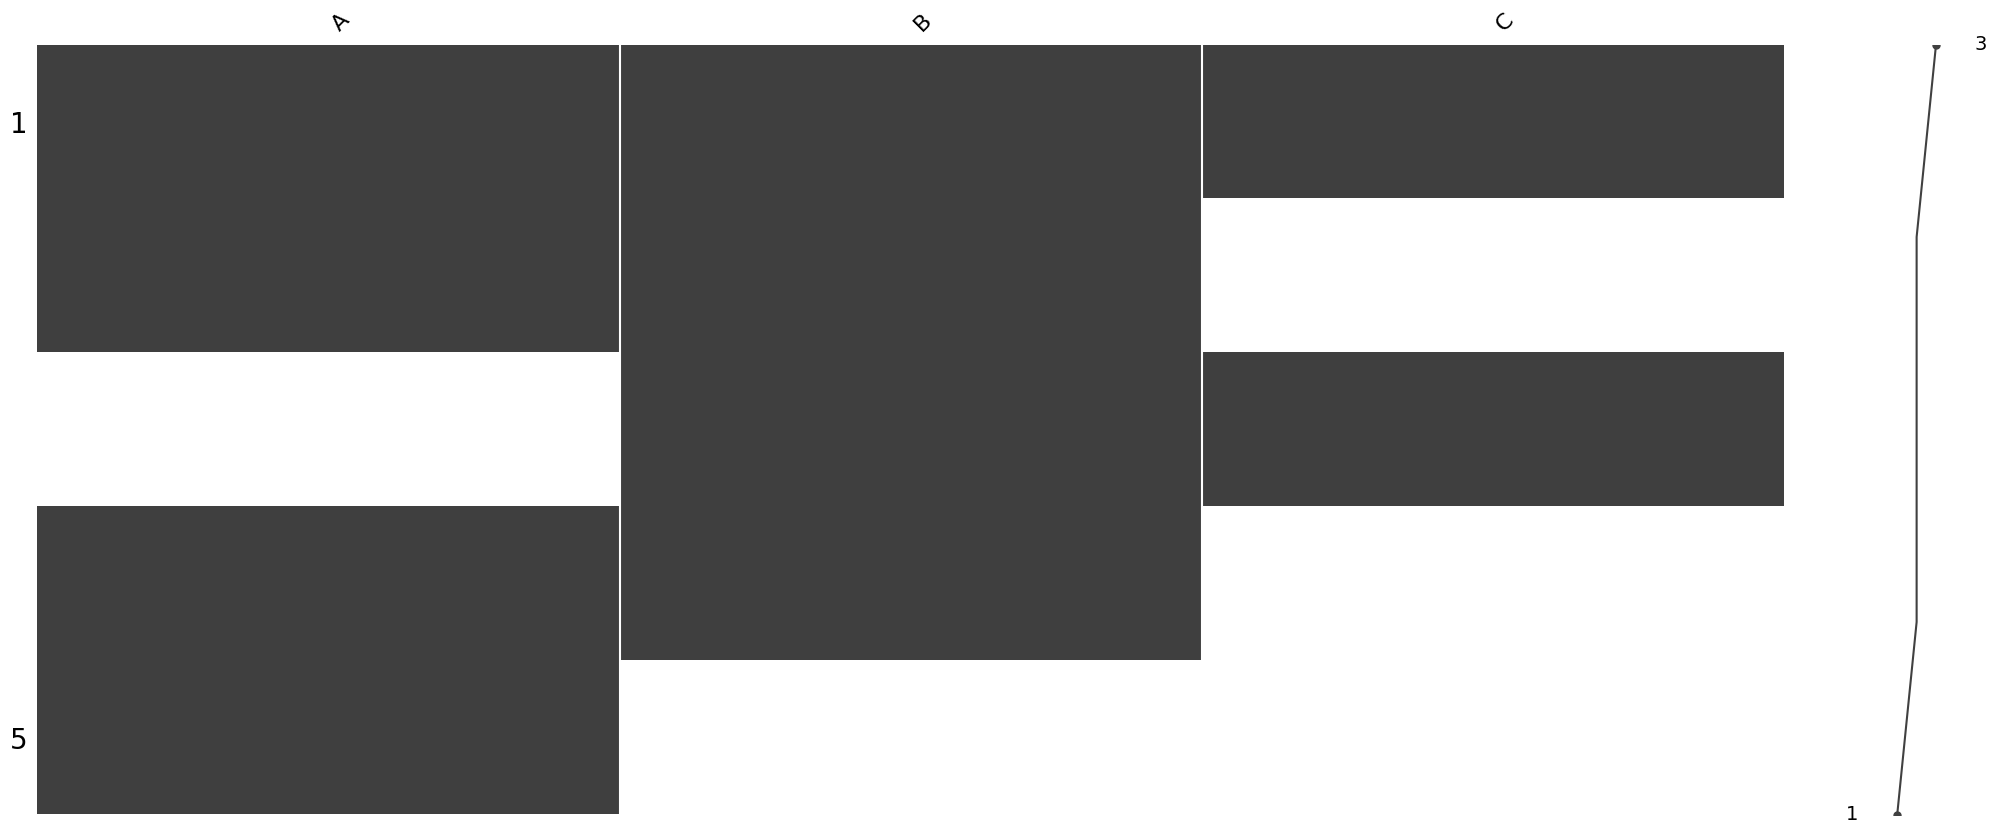

In [330]:
msno.matrix(df_with_nulls)

##### Dropna

In [331]:
df_with_nulls.dropna()

,A,B,C
0,1.0,2.0,40.0


In [332]:
df_with_nulls.dropna(thresh=2)

,A,B,C
0,1.0,2.0,40.0
1,100.0,4.0,NaN
2,NaN,2.0,20.0
3,1000.0,4.0,NaN


In [333]:
df_with_nulls.dropna(thresh=3,axis=1)

,A,B
0,1.0,2.0
1,100.0,4.0
2,NaN,2.0
3,1000.0,4.0
4,10000.0,NaN


##### Fillna

In [334]:
df_with_nulls.fillna('NOWA WARTOŚĆ')

,A,B,C
0,1.0,2.0,40.0
1,100.0,4.0,NOWA WARTOŚĆ
2,NOWA WARTOŚĆ,2.0,20.0
3,1000.0,4.0,NOWA WARTOŚĆ
4,10000.0,NOWA WARTOŚĆ,NOWA WARTOŚĆ


In [335]:
df_with_nulls['B'].fillna(df_with_nulls['B'].mean())

0    2.0
1    4.0
2    2.0
3    4.0
4    3.0
Name: B, dtype: float64

In [338]:
df_with_nulls['A'].ffill()

0        1.0
1      100.0
2      100.0
3     1000.0
4    10000.0
Name: A, dtype: float64

In [339]:
df_with_nulls['A'].backfill()

0        1.0
1      100.0
2     1000.0
3     1000.0
4    10000.0
Name: A, dtype: float64

### Merge, Join, Concatenate

In [381]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],'B': ['B0', 'B1', 'B2', 'B3'],

                    'C': ['C0', 'C1', 'C2', 'C3'],'D': ['D0', 'D1', 'D2', 'D3']},

                    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],'B': ['B4', 'B5', 'B6', 'B7'],

                    'C': ['C4', 'C5', 'C6', 'C7'],'D': ['D4', 'D5', 'D6', 'D7']},

                    index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],'B': ['B8', 'B9', 'B10', 'B11'],

                    'C': ['C8', 'C9', 'C10', 'C11'],'D': ['D8', 'D9', 'D10', 'D11']},

                    index=[8, 9, 10, 11])

##### Concatenate

In [341]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [343]:
S = pd.Series(['S1','S2','S3','S4'])
pd.concat([df1,S])

,A,B,C,D,0
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
0,NaN,NaN,NaN,NaN,S1
1,NaN,NaN,NaN,NaN,S2
2,NaN,NaN,NaN,NaN,S3
3,NaN,NaN,NaN,NaN,S4


In [344]:
pd.concat([df1,S],axis=1)

,A,B,C,D,0
0,A0,B0,C0,D0,S1
1,A1,B1,C1,D1,S2
2,A2,B2,C2,D2,S3
3,A3,B3,C3,D3,S4


In [365]:
pd.concat([df1,df2,df3],axis=1,keys=['first','secound','third'],ignore_index=True)

,0,1,2,3,4,5,6,7,8,9,10,11
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


##### Ćwiczenie
Połącz ze sobą df1, df2, df3 wzdłuż osi poziomej używając funkcji concat. Postaraj się, aby połączona tabela nie rozszerzała się na dodatkowe wiersze w dół.

In [391]:
pd.concat([df1,df2.set_index(df1.index),df3.set_index(df1.index)],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4,A8,B8,C8,D8
1,A1,B1,C1,D1,A5,B5,C5,D5,A9,B9,C9,D9
2,A2,B2,C2,D2,A6,B6,C6,D6,A10,B10,C10,D10
3,A3,B3,C3,D3,A7,B7,C7,D7,A11,B11,C11,D11


##### Merge

In [393]:
def make_keys(n):
    return [f'key{n}' for n in range(n)]
left = df1.copy()
left['key'] = make_keys(4)
right = df3.copy()
right['key'] = make_keys(4)

In [394]:
left

,A,B,C,D,key
0,A0,B0,C0,D0,key0
1,A1,B1,C1,D1,key1
2,A2,B2,C2,D2,key2
3,A3,B3,C3,D3,key3


In [395]:
right

,A,B,C,D,key
8,A8,B8,C8,D8,key0
9,A9,B9,C9,D9,key1
10,A10,B10,C10,D10,key2
11,A11,B11,C11,D11,key3


In [396]:
pd.merge(left,right,how='inner',on='key')

,A_x,B_x,C_x,D_x,key,A_y,B_y,C_y,D_y
0,A0,B0,C0,D0,key0,A8,B8,C8,D8
1,A1,B1,C1,D1,key1,A9,B9,C9,D9
2,A2,B2,C2,D2,key2,A10,B10,C10,D10
3,A3,B3,C3,D3,key3,A11,B11,C11,D11


In [399]:
new_right = pd.DataFrame({'E':['E1','E2','E3','E4','E5','E6'], 'key':make_keys(6)})
new_right

,E,key
0,E1,key0
1,E2,key1
2,E3,key2
3,E4,key3
4,E5,key4
5,E6,key5


In [400]:
pd.merge(left,new_right,how='inner',on='key')

,A,B,C,D,key,E
0,A0,B0,C0,D0,key0,E1
1,A1,B1,C1,D1,key1,E2
2,A2,B2,C2,D2,key2,E3
3,A3,B3,C3,D3,key3,E4


In [401]:
pd.merge(left,new_right,how='outer',on='key')

,A,B,C,D,key,E
0,A0,B0,C0,D0,key0,E1
1,A1,B1,C1,D1,key1,E2
2,A2,B2,C2,D2,key2,E3
3,A3,B3,C3,D3,key3,E4
4,NaN,NaN,NaN,NaN,key4,E5
5,NaN,NaN,NaN,NaN,key5,E6


##### Join

In [403]:
other = pd.DataFrame({'E':['E1','E2','E3','E4','E5','E6']},
index=['B1','B2','B3','B4','B5','B6'])
other

,E
B1,E1
B2,E2
B3,E3
B4,E4
B5,E5
B6,E6


In [405]:
left.join(other,on='B')

,A,B,C,D,key,E
0,A0,B0,C0,D0,key0,NaN
1,A1,B1,C1,D1,key1,E1
2,A2,B2,C2,D2,key2,E2
3,A3,B3,C3,D3,key3,E3


In [406]:
left.join(other,on='B',how='inner')

,A,B,C,D,key,E
1,A1,B1,C1,D1,key1,E1
2,A2,B2,C2,D2,key2,E2
3,A3,B3,C3,D3,key3,E3


##### Ćwiczenie
Użyj funkcji join, aby połączyć ze sobą tabele left oraz right według kolumny key.

In [419]:
left.join(right.set_index('key'), on='key', lsuffix='_left', rsuffix='_right')

,A_left,B_left,C_left,D_left,key,A_right,B_right,C_right,D_right
0,A0,B0,C0,D0,key0,A8,B8,C8,D8
1,A1,B1,C1,D1,key1,A9,B9,C9,D9
2,A2,B2,C2,D2,key2,A10,B10,C10,D10
3,A3,B3,C3,D3,key3,A11,B11,C11,D11


In [420]:
left.join(right.set_index('key'), on='key', how='inner', lsuffix='_left', rsuffix='_right')

,A_left,B_left,C_left,D_left,key,A_right,B_right,C_right,D_right
0,A0,B0,C0,D0,key0,A8,B8,C8,D8
1,A1,B1,C1,D1,key1,A9,B9,C9,D9
2,A2,B2,C2,D2,key2,A10,B10,C10,D10
3,A3,B3,C3,D3,key3,A11,B11,C11,D11
